In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt 
import numpy as np
from torchvision.utils import make_grid
%matplotlib inline

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = ImageFolder(root=train_dir, transform=train_transform)
test_dataset = ImageFolder(root=test_dir, transform=test_transform)

classes = ['fake', 'real']
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



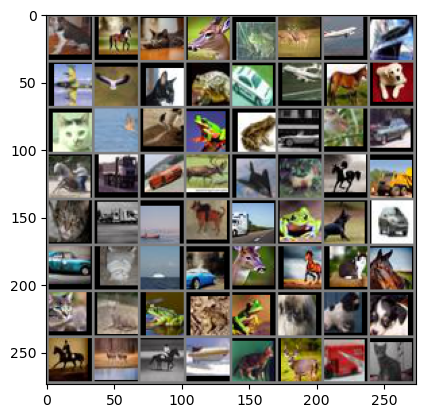

 real  fake  fake  fake  real  fake  fake  real  real  fake  real  real  real  real  real  fake  real  fake  real  fake  real  fake  real  real  real  real  real  real  real  real  fake  fake  real  fake  real  real  fake  fake  fake  real  fake  real  fake  fake  fake  fake  fake  fake  fake  real  fake  real  fake  real  real  real  fake  fake  fake  real  real  fake  real  real


In [4]:
def imshow(img):
    img = img / 2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [6]:
import torchvision.models as models
import torch.optim as optim
from torchvision.models import ResNet50_Weights

# Load pre-trained ResNet-50 model
resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)

# Modify the classifier (fully connected) layer to have 10 output classes
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet50.to(device)

num_epochs = 3
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet50(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\andre/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:11<00:00, 9.19MB/s]


[Epoch 1, Batch 100] Loss: 1.296
[Epoch 1, Batch 200] Loss: 0.573
[Epoch 1, Batch 300] Loss: 0.437
[Epoch 1, Batch 400] Loss: 0.362
[Epoch 1, Batch 500] Loss: 0.323
[Epoch 1, Batch 600] Loss: 0.290
[Epoch 1, Batch 700] Loss: 0.271
[Epoch 1, Batch 800] Loss: 0.258
[Epoch 1, Batch 900] Loss: 0.242
[Epoch 1, Batch 1000] Loss: 0.234
[Epoch 1, Batch 1100] Loss: 0.252
[Epoch 1, Batch 1200] Loss: 0.236
[Epoch 1, Batch 1300] Loss: 0.232
[Epoch 1, Batch 1400] Loss: 0.218
[Epoch 1, Batch 1500] Loss: 0.209
[Epoch 2, Batch 100] Loss: 0.200
[Epoch 2, Batch 200] Loss: 0.192
[Epoch 2, Batch 300] Loss: 0.182
[Epoch 2, Batch 400] Loss: 0.199
[Epoch 2, Batch 500] Loss: 0.174
[Epoch 2, Batch 600] Loss: 0.175
[Epoch 2, Batch 700] Loss: 0.163
[Epoch 2, Batch 800] Loss: 0.168
[Epoch 2, Batch 900] Loss: 0.172
[Epoch 2, Batch 1000] Loss: 0.170
[Epoch 2, Batch 1100] Loss: 0.176
[Epoch 2, Batch 1200] Loss: 0.167
[Epoch 2, Batch 1300] Loss: 0.154
[Epoch 2, Batch 1400] Loss: 0.161
[Epoch 2, Batch 1500] Loss: 0.16

In [8]:
print(f"Accuracy of the network on the test set: {100 * correct / total}%")

Accuracy of the network on the test set: 94.58%


In [10]:
# save the base ResNet50 model (resnet50-#epochs) 
torch.save(resnet50, 'base_resnet50_3.pth')

In [11]:
# load the base ResNet50 model and set to eval mode
base_resnet50_3 = torch.load('base_resnet50_3.pth')
base_resnet50_3.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 